C:\Users\abudzyns\AppData\Local\Temp\ipykernel_20160\2740217739.py:21: DtypeWarning: Columns (49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data_preprocessed.csv")


Reduced Data shape: (45569, 33)

Top features correlated with EUR:
 EUR               1.000000
TOTAL_KM          0.919782
QTY_LOADS         0.464913
QTY_DELIVERIES    0.460308
M3                0.193033
HEIGHT            0.192402
TONS              0.092056
OTHER_COSTS       0.041099
PAYMENT_TERM      0.011289
CUSTOMS           0.002081
Name: EUR, dtype: float64


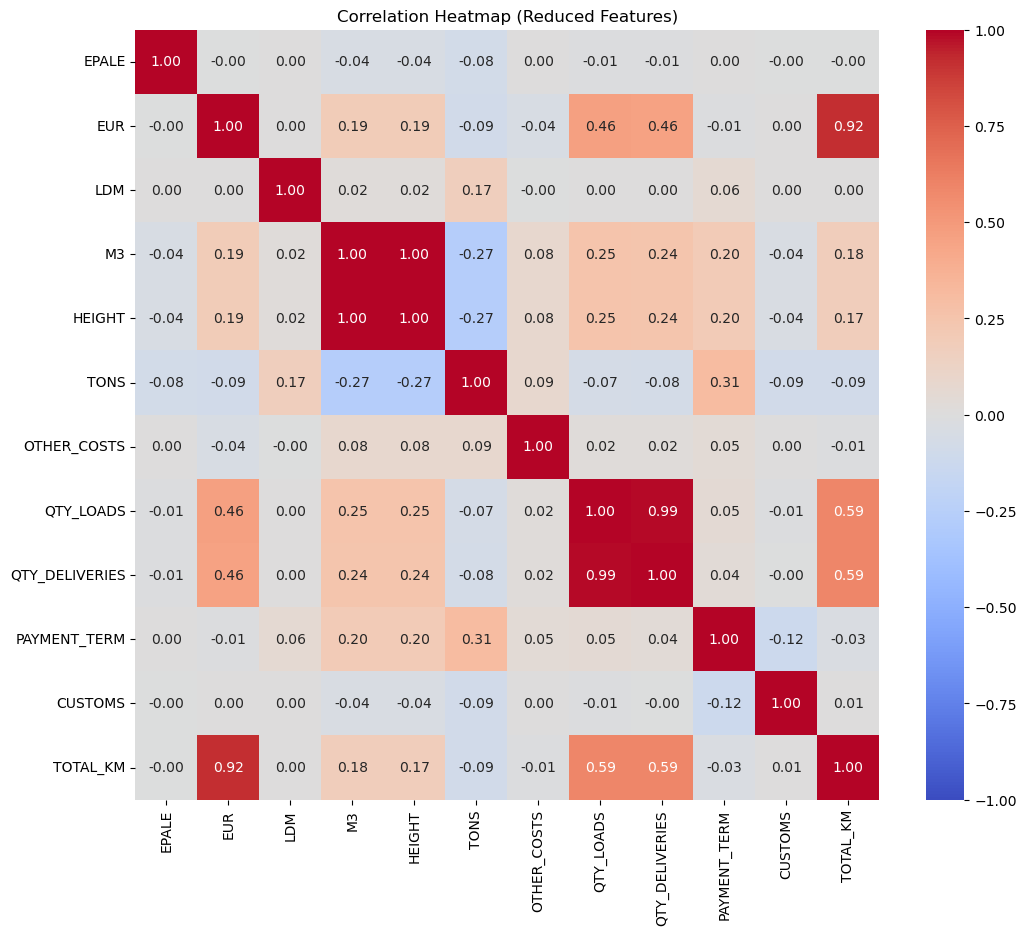

In [3]:
# -*- coding: utf-8 -*-
"""
Notebook: Correlation Analysis for Feature Selection

Steps:
1. Load preprocessed dataset.
2. Remove detailed distance features (KM), except TOTAL_KM, and exclude WIDTH, TEMP_MIN, TEMP_MAX.
3. Compute correlation matrix.
4. Identify top features correlated with the target variable EUR.

All comments in English for publication purposes.
"""

# 1. Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load preprocessed dataset
df = pd.read_csv("data_preprocessed.csv")

# 3. Drop detailed KM columns (except TOTAL_KM) and unwanted features (WIDTH, TEMP_MIN, TEMP_MAX)
km_columns = [col for col in df.columns if '_KM' in col and col != 'TOTAL_KM']
exclude_columns = km_columns + ['WIDTH', 'TEMP_MIN', 'TEMP_MAX']
df_reduced = df.drop(columns=exclude_columns)

# Check resulting dataframe structure
print("Reduced Data shape:", df_reduced.shape)

# 4. Compute correlation matrix with numerical features
numerical_features = df_reduced.select_dtypes(include=[np.number])
corr_matrix = numerical_features.corr()

# 5. Extract and display top correlated features with EUR
corr_with_eur = corr_matrix['EUR'].abs().sort_values(ascending=False)
print("\nTop features correlated with EUR:\n", corr_with_eur.head(10))

# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Reduced Features)")
plt.show()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45569 entries, 0 to 45568
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AT_KM                45569 non-null  float64
 1   BE_KM                45569 non-null  float64
 2   CZ_KM                45569 non-null  float64
 3   DE_KM                45569 non-null  float64
 4   DK_KM                45569 non-null  float64
 5   EE_KM                45569 non-null  float64
 6   ES_KM                45569 non-null  float64
 7   FI_KM                45569 non-null  float64
 8   HR_KM                45569 non-null  float64
 9   FR_KM                45569 non-null  float64
 10  HU_KM                45569 non-null  float64
 11  IT_KM                45569 non-null  float64
 12  LT_KM                45569 non-null  float64
 13  LV_KM                45569 non-null  float64
 14  NL_KM                45569 non-null  float64
 15  PL_KM                45569 non-null 